# Линейная классификация

Рассмотрим в работе способы построения линейной модели классификации.

Линейный классификатор представляет собой линейную модель, разделяющую два класса (-1, 1). Линейная модель описывается следующей формулой $\langle \omega, x \rangle + b = y$. Вектор весов $\omega$ - вектор нормали этой линейной модели. При $y = 0$, все точки $x$ принадлежат этой разделяющей прямой, при $y > 0$ объеты $x$ лежат с той стороны прямой линии, куда смотрит вектор весов $\omega$, при $y < 0$ с другой стороны прямой линии. Таким образом линейная модель разделяет все объекты на положительный и отрицательные, причем чем дальше объект лежит от прямой, тем большее абсолютное значение он имеет.

Необходимо ввести обозначение отступа:

$$M = y \langle \omega, x \rangle$$

Таким образом, если объект будет лежать со стороны своего класса (классифицироваться правильно), то $M$ всегда будет иметь положительное значение. В случае неправилной классификации отступ будет отрицательным.

Введем несколько loss-функцию, которые будет оптимизировать:

1. логистическая: $$\bar L(M) = \ln(1+ \exp(-M))$$

2. экспоненциальны: $$\bar L(M) = \exp(-M)$$

3. кусочно-линейная: $$\bar L(M) = max(0, 1-M))$$

Таким образом для каждого объекта будет вычислена его собственный штраф. Чтобы получить полную функцию потеря - просто проссумируем штрафы всех объектов.
Таким образом у нас будет функция, подсчитывающая штрафы для конкретной модели. Необходимо ее оптимизировать, для этого надо вычислить градиент и начать движение (изменение весов модели $\omega$) в сторону антиградиента с некоторым постоянным шагом.

## Задача
1. Написать функцию расчета функции потерь (loss-функции) и градиента функции. (выбрать любую функцию)
2. Реализовать градиентный спуск по всем данным.
3. Реализовать стохастический градиентный спуск.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.animation as manimation; 
manimation.writers.list()

['pillow', 'html']

In [2]:
pip install ffmpeg

Note: you may need to restart the kernel to use updated packages.


### Задача 1
Напишите две функции, которые будут получать на вход вектор весов, признаки и целевую переменную. Функции должны возвращать суммарную ошибку и градиент.

In [2]:
def loss(c_w0, c_w1, c_w2, x, y):
    w = np.array((c_w1, c_w2, c_w0))
    ones = np.reshape(np.ones(x.shape[0]), (-1, 1))
    aX = np.hstack((x, ones))
    error = 0
    for i in range(aX.shape[0]):
        M = np.multiply(np.dot(w, aX[i]), y[i])
        error += np.log(1 + np.exp(-M))
    return error

def grad_loss(c_w0, c_w1, c_w2, x, y):
    d0 = take_ds(c_w0)
    g0 = (loss(d0[0], c_w1, c_w2, x, y) - loss(d0[1], c_w1, c_w2, x, y)) / (d0[0] - d0[1])
        
    d1 = take_ds(c_w1)
    g1 = (loss(c_w0, d1[0], c_w2, x, y) - loss(c_w0, d1[1], c_w2, x, y)) / (d1[0] - d1[1])
        
    d2 = take_ds(c_w2)
    g2 = (loss(c_w0, c_w1, d2[0], x, y) - loss(c_w0, c_w1, d2[1], x, y)) / (d2[0] - d2[1])
    return g0, g1, g2

def take_ds(w):
    return (w + 1e-2, w - 1e-2)

Дан набор данных.
Проведена нормализация данных по признакам и выставлены классы (-1, 1).

Проведите случайную линейную модель, постройте ее на графике и вычислите для нее суммарную функцию ошибки.
Проверьте, что суммарная функция ошибки считается правильно.

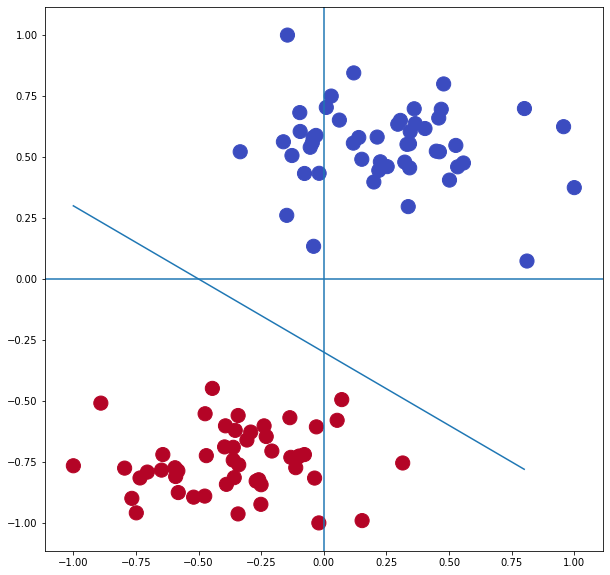

In [3]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2 ,cluster_std=1, random_state=17, center_box=(-10, 10))
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
X[:,0] = 2 * (X[:,0] - X[:,0].min()) / (X[:,0].max() - X[:,0].min()) - 1
X[:,1] = 2 * (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min()) -1 
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)
x = np.arange(-1, 1, 0.2)
w0 = 0.3
w1 = 0.6
w2 = 1

y = (-w1 * x - w0) / w2

plt.plot(x, y)
plt.axhline(0)
plt.axvline(0)
Y[Y == 0] = -1
Y *= -1


### Задача 2. Реализация метода градиентного спуска
Постройте анимационную гифку схождения вашей линейной модели к данным. Подпишите loss к каждому кадру на гифке.

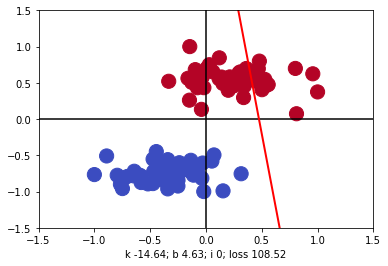

In [4]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

fig, ax = plt.subplots()

k = 10
b = -5
mb = 1e-2 # шаг обучения
mk = 1
w2 = 1

# Данные
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig.figsize=(10,10)

# Модель данных
line = lambda x1 : -(x1 * k + b)
clf, = ax.plot([X[:,0].min() - .5, X[:,0].max() + .5], [line(X[:,0].min() - .5), line(X[:,0].max() + .5)], 'r-', linewidth=2)

# Настройка графика
ax.set_xlim([X[:,0].min() - .5, X[:,0].max() + .5])
ax.set_ylim([X[:,1].min() - .5, X[:,1].max() + .5])


def update(i):
    global w, X, Y, mb, bk, k, b, w2
    
    # Градиент в примере задан постоянными величинами
    # На деле после каждой итерации необходимо пересчитывать градиент и изменять веса модели.

    div_w0, div_w1, div_w2 = grad_loss(b, k, w2, X, Y)
    
    k -= mk * div_w1
    b -= mb * div_w0
    w2 -= mb * div_w2

    label = 'k {0:.2f}; b {1:.2f}; i {2}; loss {3:.2f}'.format(-k, -b, i, loss(b, k, 1, X, Y))

    line = lambda c_x : -(c_x * k + b)/w2
    clf.set_ydata([line(X[:,0].min()), line(X[:,0].max())])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, 100))
rc('animation', html='html5')


In [5]:
anim

RuntimeError: Requested MovieWriter (ffmpeg) not available

### Задача 3. Реализация стохастического градиентного спуска.
Используйте на каждой итерации не весь набор данных, а $n$ случайных объектов из выборки. Оформите результат схождения вашей модели в виде гифки.

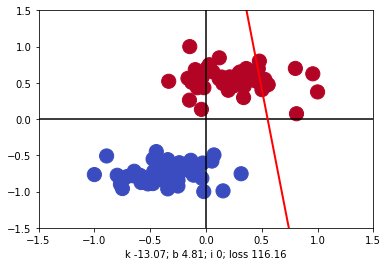

In [7]:
fig, ax = plt.subplots()

k = 10
b = -5
mb = 1e-2 # шаг обучения
mk = 1
n = 50
w2=1

# Данные
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig.figsize=(10,10)

# Модель данных
line = lambda x1 : -(x1 * k + b)
clf, = ax.plot([X[:,0].min() - 0.5, X[:,0].max() + 0.5], [line(X[:,0].min() - 0.5), line(X[:,0].max() + 0.5)], 'r-', linewidth=2)

# Настройка графика
ax.set_xlim([X[:,0].min() - 0.5, X[:,0].max() + 0.5])
ax.set_ylim([X[:,1].min() - 0.5, X[:,1].max() + 0.5])


def update(i):
    global w, X, Y, mb, bk, k, b, w2
    
    # Градиент в примере задан постоянными величинами
    # На деле после каждой итерации необходимо пересчитывать градиент и изменять веса модели.

    sX = np.zeros((n, X.shape[1]))
    sY = np.zeros(n)
    indexes = list(np.arange(X.shape[0]))
    for j in range(n):
        index = np.random.choice(indexes)
        sX[j] = X[index]
        sY[j] = Y[index]
        indexes.remove(index)

    div_w0, div_w1, div_w2 = grad_loss(b, k, w2, sX, sY)
    
    k -= mk * div_w1
    b -= mb * div_w0
    w2 -= mb * div_w2

    label = 'k {0:0.2f}; b {1:0.2f}; i {2}; loss {3:0.2f}'.format(-k, -b, i, loss(b, k, 1, X, Y))

    line = lambda c_x : -(c_x * k + b)/w2
    clf.set_ydata([line(X[:,0].min()), line(X[:,0].max())])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, 100))
rc('animation', html='html5')

In [8]:
anim

RuntimeError: Requested MovieWriter (ffmpeg) not available